In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import pandas as pd 

In [18]:
train_path = r"D:\New_folder\train"
test_path = r"D:\New_folder\test"
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
    

In [19]:
img_height, img_width = 150,150
batch_size = 32
train_generator = train_datagen.flow_from_directory(
    train_path ,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = train_datagen.flow_from_directory(
    test_path ,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 19210 images belonging to 4 classes.
Found 4810 images belonging to 4 classes.


In [20]:
label_names = list(train_generator.class_indices.keys())
print( label_names)

['angry', 'happy', 'sad', 'surprise']


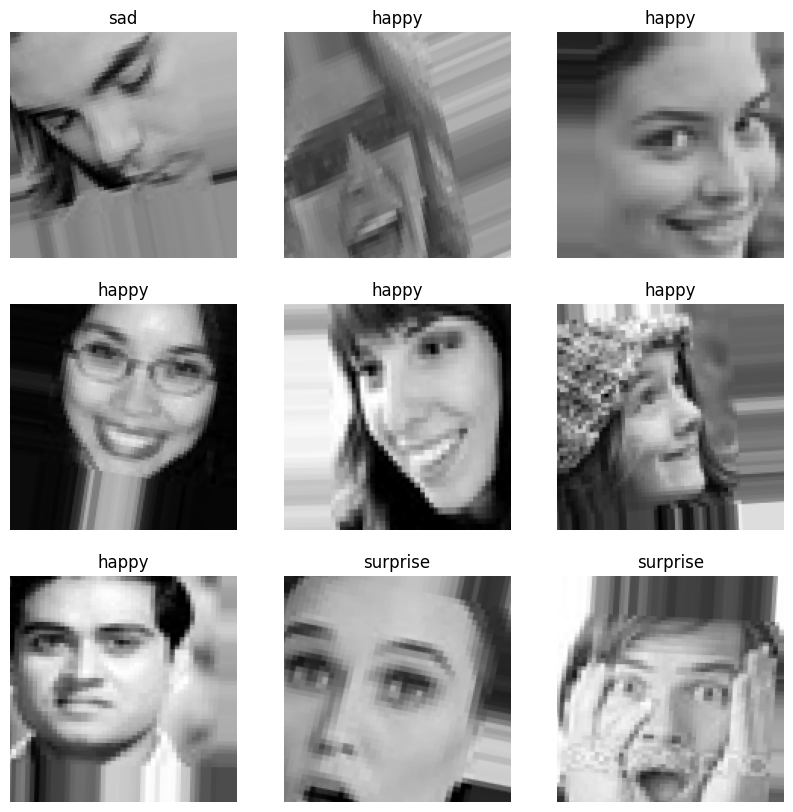

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize =(10,10))
images , labels = next(train_generator)
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(images[i].squeeze())
    class_index = np.argmax(labels[i])
    plt.title(label_names[class_index])
    plt.axis('off')
plt.show()

In [22]:
from tensorflow.keras import models,layers
import warnings
warnings.filterwarnings('ignore')

In [23]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu',),
    layers.Dropout(0.5), 
    layers.Dense(4, activation='softmax')
])
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 15, 15, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 7, 7, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 512)                 │       6,423,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 4)                   │           2,052 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,813,508 (25.99 MB)

 Trainable params: 6,813,508 (25.99 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [25]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',       
    patience=3,               
    restore_best_weights=True 
)

In [33]:
history = model.fit(train_generator, epochs=20, validation_data=val_generator,callbacks=[early_stopping])

Epoch 1/20
601/601 ━━━━━━━━━━━━━━━━━━━━ 831s 1s/step - accuracy: 0.6288 - loss: 0.8879 - val_accuracy: 0.6324 - val_loss: 0.8822
Epoch 2/20
601/601 ━━━━━━━━━━━━━━━━━━━━ 646s 1s/step - accuracy: 0.6470 - loss: 0.8632 - val_accuracy: 0.6482 - val_loss: 0.8473
Epoch 3/20
601/601 ━━━━━━━━━━━━━━━━━━━━ 646s 1s/step - accuracy: 0.6464 - loss: 0.8533 - val_accuracy: 0.6611 - val_loss: 0.8359
Epoch 4/20
601/601 ━━━━━━━━━━━━━━━━━━━━ 633s 1s/step - accuracy: 0.6573 - loss: 0.8373 - val_accuracy: 0.6557 - val_loss: 0.8409
Epoch 5/20
601/601 ━━━━━━━━━━━━━━━━━━━━ 655s 1s/step - accuracy: 0.6608 - loss: 0.8209 - val_accuracy: 0.6769 - val_loss: 0.8020
Epoch 6/20
601/601 ━━━━━━━━━━━━━━━━━━━━ 622s 1s/step - accuracy: 0.6674 - loss: 0.8101 - val_accuracy: 0.6719 - val_loss: 0.8111
Epoch 7/20
601/601 ━━━━━━━━━━━━━━━━━━━━ 604s 1s/step - accuracy: 0.6780 - loss: 0.7869 - val_accuracy: 0.6786 - val_loss: 0.7775
Epoch 8/20
601/601 ━━━━━━━━━━━━━━━━━━━━ 612s 1s/step - accuracy: 0.6835 - loss: 0.7717 - val_accu

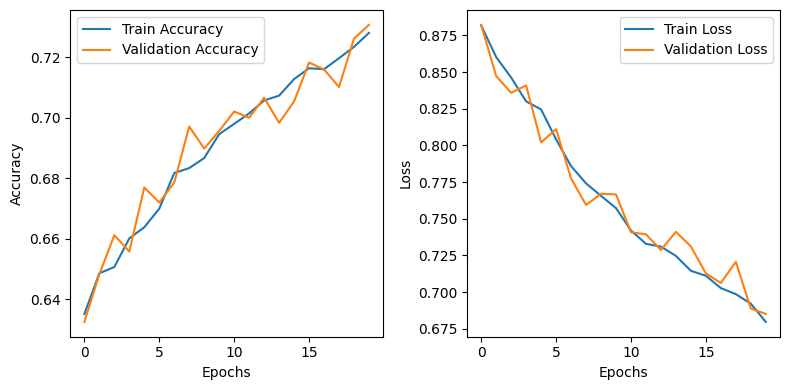

In [34]:
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


plt.tight_layout()
plt.show()

In [ ]:
import tensorflow as tf
image = "PrivateTest_2642370.jpg"
image = tf.keras.utils.load_img(image,target_size=(150, 150))
image_array = tf.keras.utils.array_to_img(image)
image_batch = tf.expand_dims(image_array,axis=0)

In [31]:
prediction = model.predict(image_batch)
score = tf.nn.softmax(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


In [32]:
print('image is with {} accuracy of {:0.2f} '.format(label_names[np.argmax(score)],np.max(score)*100))

image is with angry accuracy of 47.54 
